In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sbn
import matplotlib.pyplot as plt 
import os

In [21]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
#check for null values 

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

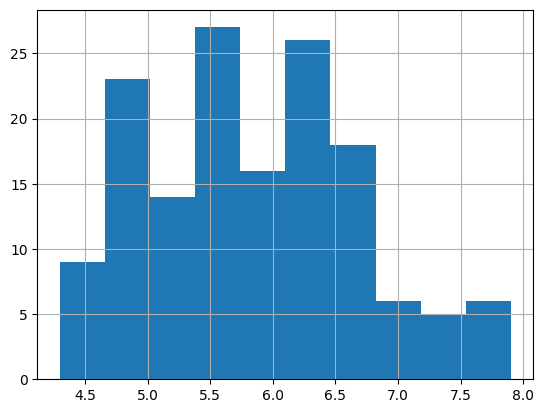

In [27]:
#explore data

df['SepalLengthCm'].hist()

<Axes: >

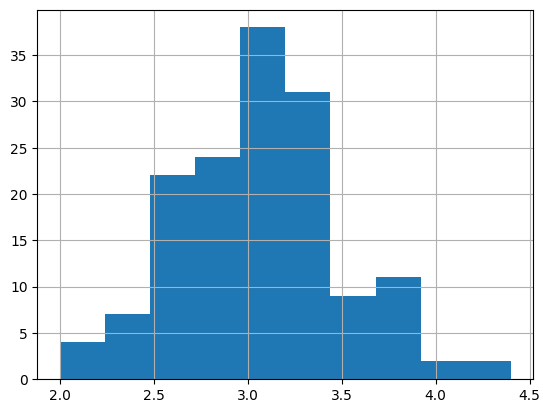

In [28]:
df['SepalWidthCm'].hist()

<Axes: >

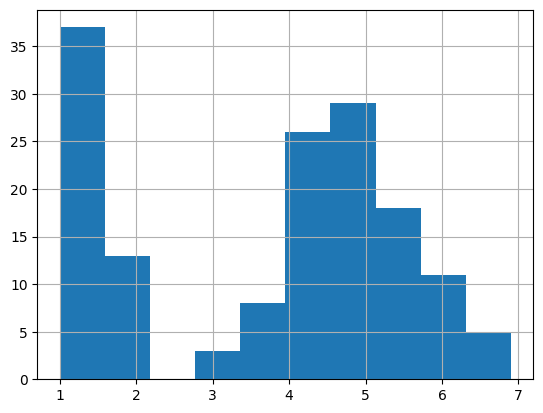

In [30]:
df['PetalLengthCm'].hist()

<Axes: >

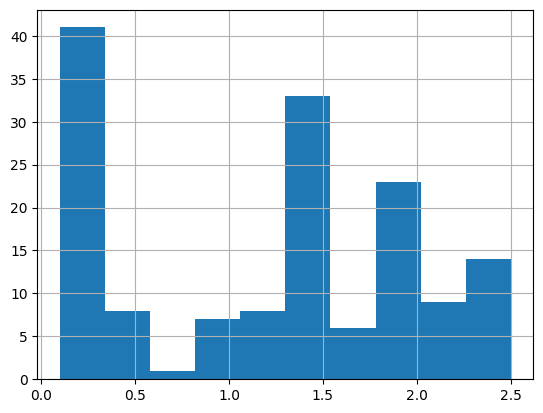

In [31]:
df['PetalWidthCm'].hist()

<Axes: >

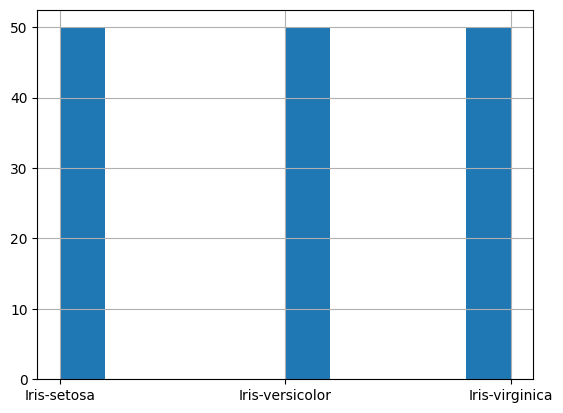

In [32]:
df['Species'].hist()

In [33]:
#scatterplot

colors = ['green', 'red', 'orange']
species = ['Iris-setosa','Iris-versicolor','Iris-verginica']

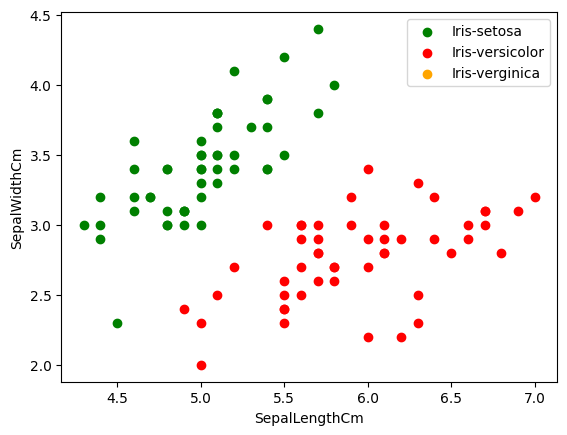

In [35]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i], label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

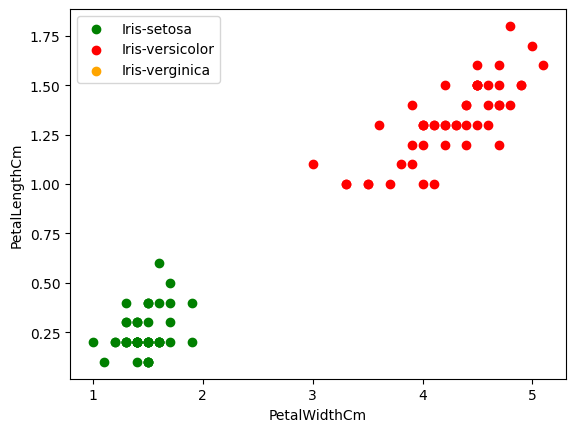

In [39]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i], label=species[i])
plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

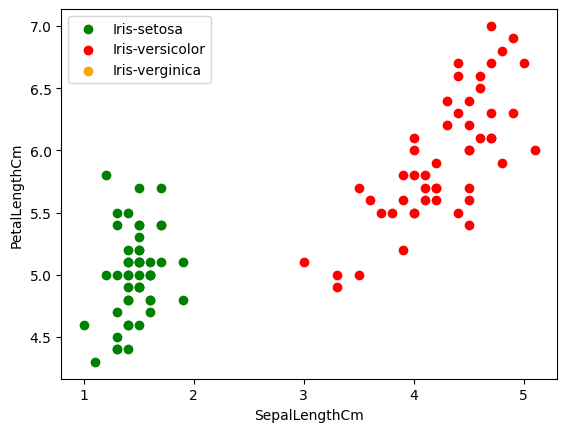

In [40]:
for i in range(3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['SepalLengthCm'],c = colors[i], label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

In [41]:
#corrollation methord

df.corr()

C:\Users\Evans\AppData\Local\Temp\ipykernel_7904\2871213464.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\Evans\AppData\Local\Temp\ipykernel_7904\1448540538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

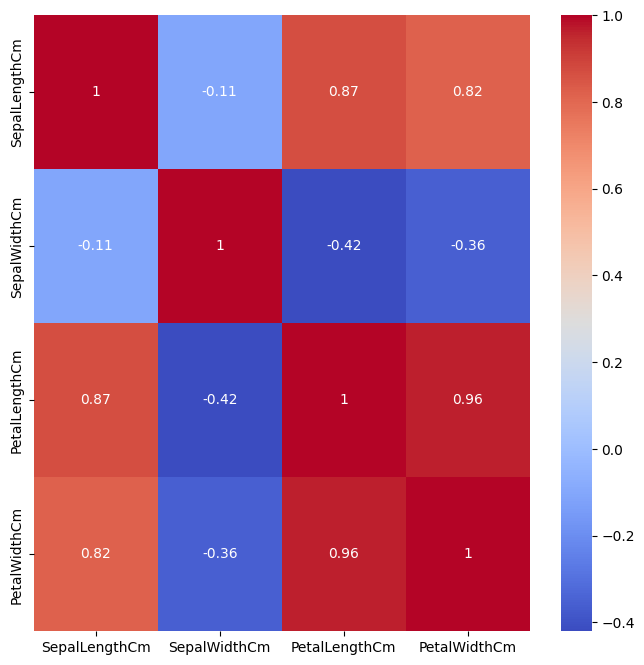

In [46]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(8,8))
sbn.heatmap(corr, annot = True, ax = ax , cmap = 'coolwarm')

In [72]:
# label encoding ==convert labels in the same column to numeric form

from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

In [73]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [74]:
#train model 

from sklearn.model_selection import train_test_split

# train 75 
# test 25 

X = df.drop(columns =['Species'])
Y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25)

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [76]:
model.fit(x_train,y_train)

LogisticRegression()

In [77]:
print("acc:", model.score(x_test,y_test)*100)

acc: 100.0


In [78]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier()


In [79]:
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
print("acc:", model1.score(x_test,y_test)*100)

acc: 100.0


In [81]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()




In [82]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
print("acc:", model2.score(x_test,y_test)*100)

acc: 97.36842105263158
